In [1]:
import pandas as pd
import numpy as np
import random
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import (GradientBoostingClassifier, GradientBoostingRegressor,
                              RandomForestClassifier, RandomForestRegressor)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

In [2]:
data_path = r'data/'
train_set = pd.read_csv(data_path+'train.csv')
test_set = pd.read_csv(data_path+'test.csv')

In [3]:
train_set.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 数据说明
1. PassengerId -> 乘客ID
2. Pclass -> 乘客等级（1/2/3等舱位）
3. Name -> 乘客姓名
4. Sex -> 乘客性别
5. Age -> 年龄
6. SlibSp -> 堂兄弟/妹个数
7. Parch -> 父母与小孩个数
8. Ticket -> 船票信息
9. Fare -> 票价
10. Cabin -> 客舱
11. Embarked -> 登船港口

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


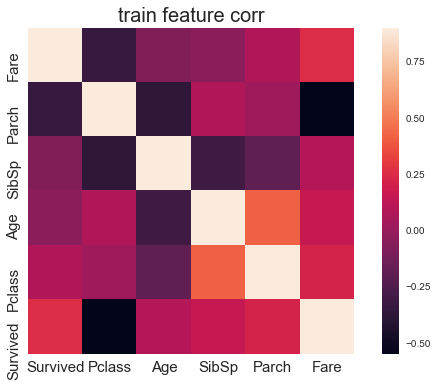

In [9]:
%matplotlib inline
sns.set(context="paper", font="monospace")
sns.set(style="white")
f, ax = plt.subplots(figsize = (10, 6))
train_corr = train_set.drop('PassengerId', axis=1).corr()
sns.heatmap(train_corr, ax=ax, vmax=0.9, square=True)
ax.set_xticklabels(train_corr.index, size=15)
ax.set_yticklabels(train_corr.columns[::-1], size=15)
ax.set_title('train feature corr', fontsize=20)

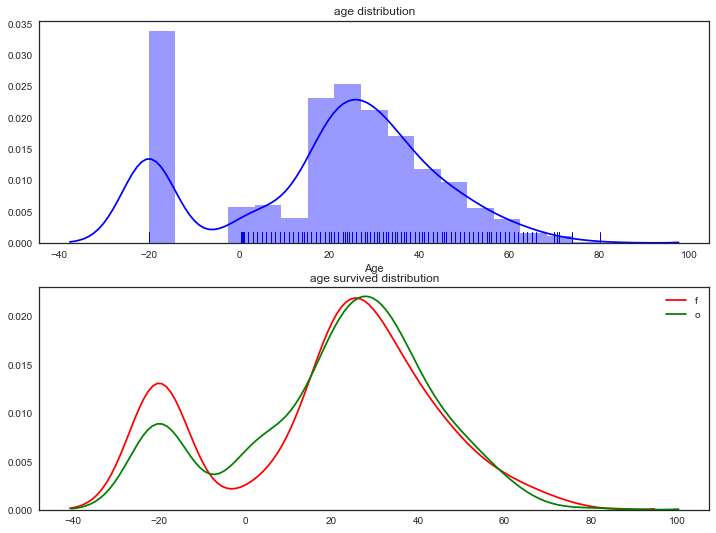

In [15]:
from scipy import stats
fig, axes = plt.subplots(2, 1, figsize=(12, 9))
sns.set_style('white')
sns.distplot(train_set.Age.fillna(-20), rug=True, color='b', ax=axes[0])
ax0 = axes[0]
ax0.set_title('age distribution')
ax0.set_label('')

ax1 = axes[1]
ax1.set_title('age survived distribution')
k1 = sns.distplot(train_set[train_set.Survived==0].Age.fillna(-20), hist=False, color='r', ax=ax1, label='dead')
k2 = sns.distplot(train_set[train_set.Survived==1].Age.fillna(-20), hist=False, color='g', ax=ax1, label='alive')
ax1.set_xlabel('')

ax1.legend('fontsize=16')

**年龄缺省值用-20进行填充，然后做年龄的分布以及不同存活情况下的年龄分布:**
1. 无论获救与否，Age分布都很宽，小孩和年纪中等偏大的人获救更容易一些
2. age和survived并不是线性关系,如果用线性模型，这个特征也许需要离散处理,然后作为类别变量代入模型
3. 获救的人之中，年龄缺省更少

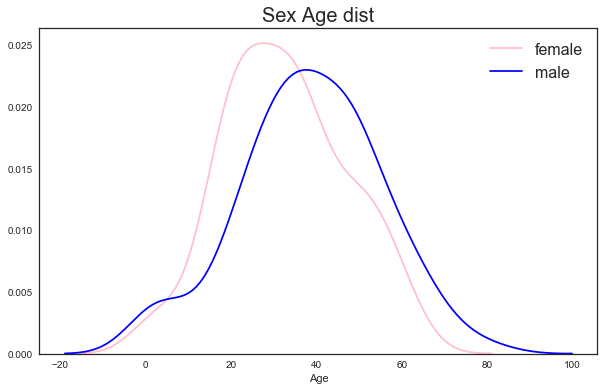

In [20]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Sex Age dist', size=20)
sns.distplot(train_set[train_set.Sex=='female'].dropna().Age, hist=False, color='pink', label='female')
sns.distplot(train_set[train_set.Sex=='male'].dropna().Age, hist=False, color='blue', label='male')
ax.legend(fontsize=16)

**男性中老年人多，女性更年轻；小孩中男孩较多**

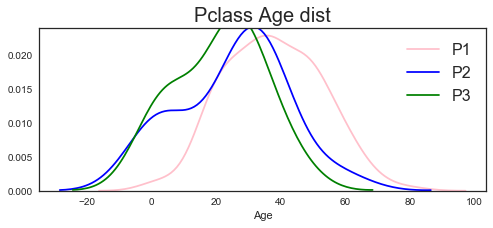

In [21]:
f, ax = plt.subplots(figsize=(8, 3))
ax.set_title('Pclass Age dist', size=20)
sns.distplot(train_set[train_set.Pclass==1].dropna().Age, hist=False, color='pink', label='P1')
sns.distplot(train_set[train_set.Pclass==2].dropna().Age, hist=False, color='blue', label='P2')
sns.distplot(train_set[train_set.Pclass==3].dropna().Age, hist=False, color='g', label='P3')
ax.legend(fontsize=16)

**仓位等级越高，年龄越偏大**

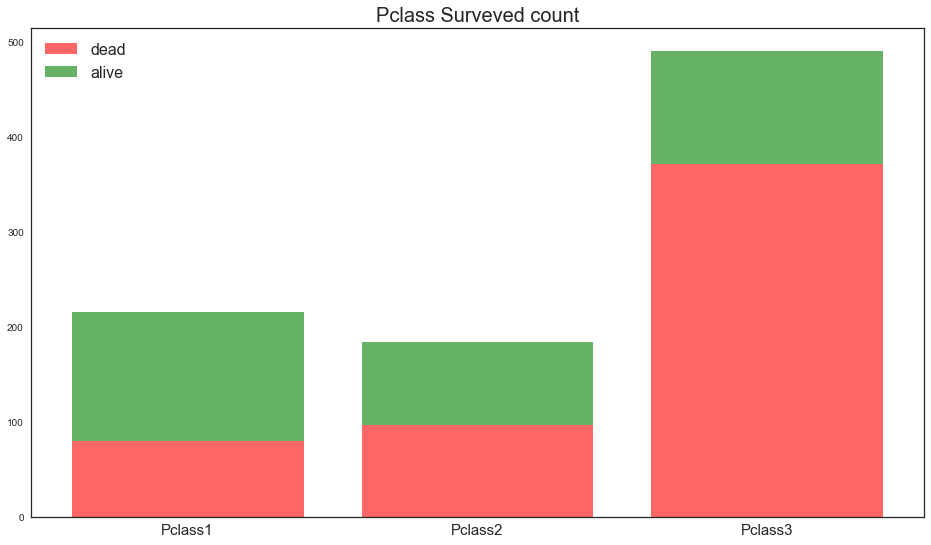

In [22]:
y_dead = train_set[train_set.Survived==0].groupby('Pclass')['Survived'].count()
y_alive = train_set[train_set.Survived==1].groupby('Pclass')['Survived'].count()
pos = [1, 2, 3]
ax = plt.figure(figsize=(16, 9)).add_subplot(111)
ax.bar(pos, y_dead, color='r', alpha=0.6, label='dead')
ax.bar(pos, y_alive, color='g', bottom=y_dead, alpha=0.6, label='alive')
ax.legend(fontsize=16, loc='best')
ax.set_xticks(pos)
ax.set_xticklabels(['Pclass%d'%(i) for i in range(1,4)], size=15)
ax.set_title('Pclass Surveved count', size=20)

In [29]:
pos = range(0, 6)
age_list = []
for Pclass_ in range(1,4):
    Pclass_set = train_set[(train_set.Pclass == Pclass_)]
    for Survived_ in range(0,2):
        age_list.append(Pclass_set[(Pclass_set.Survived == Survived_)].Age.values)

fig, axes=plt.subplots(3,1,figsize=(10,6))

i_Pclass = 1
for ax in axes:
    sns.distplot(age_list[i_Pclass*2-2], hist=False, ax=ax, label='Pclass:%d, survived:0'%(i_Pclass), color='y')
    sns.distplot(age_list[i_Pclass*2-1], hist=False, ax=ax, label='Pclass:%d, survived:1'%(i_Pclass), color='b')
    i_Pclass += 1
    ax.set_xlabel('age', size=15)
    ax.legend(fontsize=15)



C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


In [18]:
print(train_set.Sex.value_counts())
print('************************************')
print(train_set.groupby('Sex')['Survived'].mean())

male      577
female    314
Name: Sex, dtype: int64
************************************
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


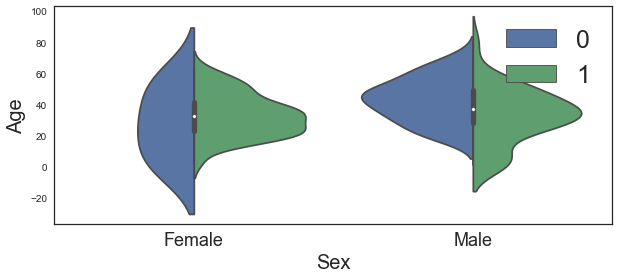

In [19]:
ax = plt.figure(figsize=(10,4)).add_subplot(111)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_set.dropna(), split=True)
ax.set_xlabel('Sex',size=20)
ax.set_xticklabels(['Female','Male'], size=18)
ax.set_ylabel('Age',size=20)
ax.legend(fontsize=25,loc='best')

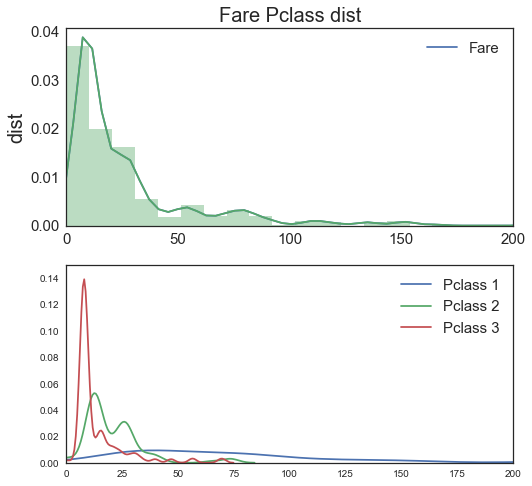

In [40]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot2grid((2,2), (0,0), colspan=2)

ax.tick_params(labelsize=15)
ax.set_title('Fare dist', size=20)
ax.set_ylabel('dist', size=20)
sns.kdeplot(train_set.Fare, ax=ax)
sns.distplot(train_set.Fare, ax=ax)
ax.legend(fontsize=15)
pos = range(0,400,50)
ax.set_xticks(pos)
ax.set_xlim([0, 200])
ax.set_xlabel('')

ax1 = plt.subplot2grid((2,2), (1,0), colspan=2)
ax.set_title('Fare Pclass dist', size=20)
for i in range(1,4):
    sns.kdeplot(train_set[train_set.Pclass==i].Fare, ax=ax1, label='Pclass %d'%(i))
ax1.set_xlim([0,200])
ax1.set_ylim([0, 0.15])
ax1.legend(fontsize=15)

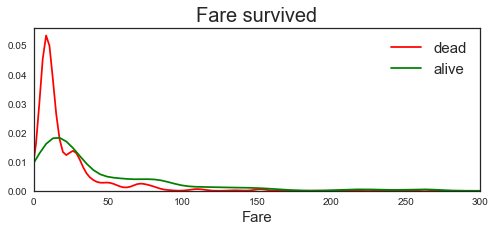

In [38]:
fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(111)
sns.kdeplot(train_set[train_set.Survived==0].Fare, ax=ax1, label='dead', color='r')
sns.kdeplot(train_set[train_set.Survived==1].Fare, ax=ax1, label='alive', color='g')
ax1.set_xlim([0,300])
ax1.legend(fontsize=15)
ax1.set_title('Fare survived', size=20)
ax1.set_xlabel('Fare', size=15)

In [41]:
train_set['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [42]:
train_set['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

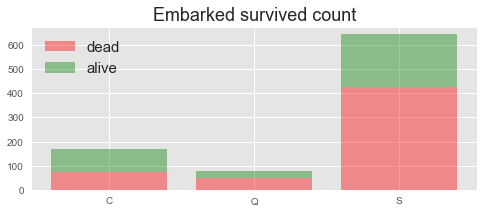

In [43]:
plt.style.use('ggplot')
ax = plt.figure(figsize=(8,3)).add_subplot(111)
pos = [1, 2, 3]
y1 = train_set[train_set.Survived==0].groupby('Embarked')['Survived'].count().sort_index().values
y2 = train_set[train_set.Survived==1].groupby('Embarked')['Survived'].count().sort_index().values
ax.bar(pos, y1, color='r', alpha=0.4, align='center', label='dead')
ax.bar(pos, y2, color='g', alpha=0.4, align='center', label='alive', bottom=y1)
ax.set_xticks(pos)
ax.set_xticklabels(['C','Q','S'])
ax.legend(fontsize=15, loc='best')
ax.set_title('Embarked survived count', size=18)

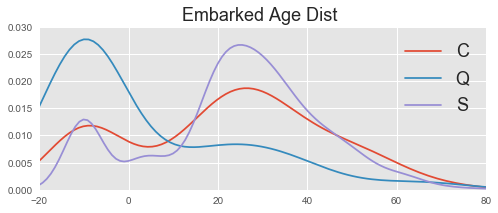

In [45]:
ax = plt.figure(figsize=(8,3)).add_subplot(111)
ax.set_xlim([-20, 80])
ax.set_ylim([0, 0.03])
sns.kdeplot(train_set[train_set.Embarked=='C'].Age.fillna(-10), ax=ax, label='C')
sns.kdeplot(train_set[train_set.Embarked=='Q'].Age.fillna(-10), ax=ax, label='Q')
sns.kdeplot(train_set[train_set.Embarked=='S'].Age.fillna(-10), ax=ax, label='S')
ax.legend(fontsize=18)
ax.set_title('Embarked Age Dist ', size=18)

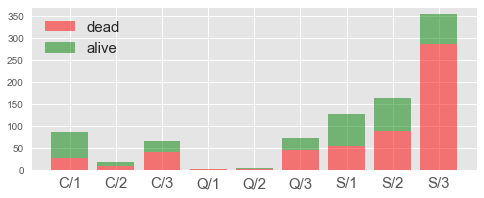

In [46]:
y1 = train_set[train_set.Survived==0].groupby(['Embarked','Pclass'])['Survived'].count().reset_index()['Survived'].values
y2 = train_set[train_set.Survived==1].groupby(['Embarked','Pclass'])['Survived'].count().reset_index()['Survived'].values

ax = plt.figure(figsize=(8,3)).add_subplot(111)
pos = range(9)
ax.bar(pos, y1, align='center', alpha=0.5, color='r', label='dead')
ax.bar(pos, y2, align='center', bottom=y1, alpha=0.5, color='g', label='alive')

ax.set_xticks(pos)
xticklabels = []
for embarked_val in ['C','Q','S']:
    for pclass_val in range(1,4):
        xticklabels.append('%s/%d'%(embarked_val,pclass_val))

ax.set_xticklabels(xticklabels,size=15)
ax.legend(fontsize=15, loc='best')

In [48]:
train_set.Cabin.isnull().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [49]:
train_set.groupby(by=train_set.Cabin.isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [50]:
train_set[train_set.Cabin.apply(lambda x: len(x) if (x is not np.nan) else 0) > 4].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


In [56]:
train_set['Cabin_Zone'] = train_set.Cabin.fillna('0').str.split(' ').apply(lambda x: x[0][0])

In [57]:
train_set.groupby(by='Cabin_Zone')['Survived'].agg(['mean', 'count'])

,mean,count
Cabin_Zone,,
0,0.299854,687
A,0.466667,15
B,0.744681,47
C,0.593220,59
D,0.757576,33
E,0.750000,32
F,0.615385,13
G,0.500000,4
T,0.000000,1


In [61]:
train_set.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [65]:
train_set.Name.apply(lambda x: x.split(',')[1].split('.')[0]).value_counts()[:10]

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
Name: Name, dtype: int64

In [66]:
train_set.Name.apply(lambda x: x.split(',')[1].split('.')[1]).value_counts()[:10]

 John             9
 James            7
 Mary             6
 William          6
 Ivan             4
 Bertha           4
 William John     4
 William Henry    4
 Anna Sofia       3
 Patrick          3
Name: Name, dtype: int64

## **简单的特征工程**

In [70]:
print ('***********Train*************')
print (train_set.isnull().sum())
print ('***********Test*************')
print (test_set.isnull().sum())

***********Train*************
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin_Zone       0
dtype: int64
***********Test*************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [71]:
train_set[train_set.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Zone
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


In [72]:
print(train_set.Embarked.value_counts())
print('*************************')
print(train_set[(train_set.Pclass==1)].Embarked.value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
*************************
S    127
C     85
Q      2
Name: Embarked, dtype: int64


### 不分仓位来看，S区域登船的人最多；  
### 缺失的两名乘客是头等舱，头等舱从S区域登船的人最多，其次是C，简单处理的话我们可以直接用S进行填充

In [73]:
train_set.Embarked.fillna('S',inplace=True)

In [74]:
train_set['Cabin'] = train_set['Cabin'].isnull().apply(lambda x: 'Null' if x is True else 'Not Null')
test_set['Cabin'] = test_set['Cabin'].isnull().apply(lambda x: 'Null' if x is True else 'Not Null')

In [76]:
del train_set['Name'], test_set['Name']
del train_set['Ticket'], test_set['Ticket']

KeyError: 'Name'

In [77]:
train_set.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Zone
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,Null,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,Not Null,C,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,Null,S,0
3,4,1,1,female,35.0,1,0,113803,53.1000,Not Null,S,C
4,5,0,3,male,35.0,0,0,373450,8.0500,Null,S,0


In [78]:
test_set.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Null,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Null,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Null,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Null,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Null,S


In [79]:
del test_set['Name']

In [80]:
test_set.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,Null,Q
1,893,3,female,47.0,1,0,363272,7.0000,Null,S
2,894,2,male,62.0,0,0,240276,9.6875,Null,Q
3,895,3,male,27.0,0,0,315154,8.6625,Null,S
4,896,3,female,22.0,1,1,3101298,12.2875,Null,S


In [81]:
del train_set['Ticket'], test_set['Ticket']

In [82]:
train_set.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_Zone
0,1,0,3,male,22.0,1,0,7.2500,Null,S,0
1,2,1,1,female,38.0,1,0,71.2833,Not Null,C,C
2,3,1,3,female,26.0,0,0,7.9250,Null,S,0
3,4,1,1,female,35.0,1,0,53.1000,Not Null,S,C
4,5,0,3,male,35.0,0,0,8.0500,Null,S,0


In [83]:
test_set.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,Null,Q
1,893,3,female,47.0,1,0,7.0000,Null,S
2,894,2,male,62.0,0,0,9.6875,Null,Q
3,895,3,male,27.0,0,0,8.6625,Null,S
4,896,3,female,22.0,1,1,12.2875,Null,S


In [84]:
#以5岁为一个周期离散，同时10以下，60岁以上的年分别归类
def age_map(x):
    if x<10:
        return '10-'
    if x<60:
        return '%d-%d'%(x//5*5, x//5*5+5)
    elif x>=60:
        return '60+'
    else:
        return 'Null'

train_set['Age_map'] = train_set['Age'].apply(lambda x: age_map(x))
test_set['Age_map'] = test_set['Age'].apply(lambda x: age_map(x))
#打印出来看看
train_set.groupby('Age_map')['Survived'].agg(['count','mean'])

,count,mean
Age_map,,
10-,62,0.612903
10-15,16,0.437500
15-20,86,0.395349
20-25,114,0.342105
25-30,106,0.358491
30-35,95,0.421053
35-40,72,0.458333
40-45,48,0.375000
45-50,41,0.390244


In [85]:
test_set[test_set.Fare.isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_map
152,1044,3,male,60.5,0,0,NaN,Null,S,60+


In [86]:
test_set.loc[test_set.Fare.isnull(), 'Fare'] = test_set[(test_set.Pclass==1)&(test_set.Embarked=='S')&(test_set.Sex=='male')].dropna().Fare.mean()

In [87]:
scaler = preprocessing.StandardScaler()
fare_scale_param = scaler.fit(train_set['Fare'].values.reshape(-1, 1))
train_set.Fare = fare_scale_param.transform(train_set['Fare'].values.reshape(-1, 1))
test_set.Fare = fare_scale_param.transform(test_set['Fare'].values.reshape(-1, 1))

In [88]:
train_x = pd.concat([train_set[['SibSp','Parch','Fare']], pd.get_dummies(train_set[['Pclass','Sex','Cabin','Embarked','Age_map']])], axis=1)
train_y = train_set.Survived
test_x = pd.concat([test_set[['SibSp','Parch','Fare']], pd.get_dummies(test_set[['Pclass', 'Sex','Cabin','Embarked', 'Age_map']])], axis=1)

In [1]:
train_y.info()

NameError: name 'train_y' is not defined

In [93]:
base_line_model = LogisticRegression()
param = {'penalty':['l1', 'l2'], 'C':[0.1, 0.5, 1.0, 2.5, 5.0]}
gs = GridSearchCV(estimator=base_line_model, param_grid=param, cv=5, n_jobs=2)
gs.fit(train_x, train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 0.5, 1.0, 2.5, 5.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

(0.79944878163661914, 0.029496353096645223)

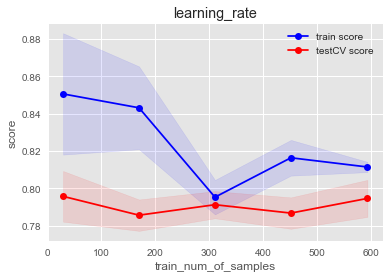

In [95]:
def plot_learning_curve(clf, title, X, y, ylim=None, cv=None, n_jobs=3, train_sizes=np.linspace(.05, 1., 5)):
    train_sizes, train_scores, test_scores = learning_curve(clf, X, y, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    ax = plt.figure().add_subplot(111)
    ax.set_title(title)
    if ylim is not None:
        ax.ylim(*ylim)
    ax.set_xlabel(u"train_num_of_samples")
    ax.set_ylabel(u"score")

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                     alpha=0.1, color="b")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                     alpha=0.1, color="r")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"train score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"testCV score")

    ax.legend(loc="best")

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(gs, u"learning_rate", train_x, train_y)

In [96]:
gender_submission = pd.DataFrame({'PassengerId':test_set.iloc[:,0], 'Survived':gs.predict(test_x)})
gender_submission.to_csv('prediction.csv', index=None)

In [103]:
train_set['Cabin'].describe()


count      891
unique       2
top       Null
freq       687
Name: Cabin, dtype: object

In [104]:
train_set['Fare'].describe()

count    8.910000e+02
mean    -4.373606e-17
std      1.000562e+00
min     -6.484217e-01
25%     -4.891482e-01
50%     -3.573909e-01
75%     -2.424635e-02
max      9.667167e+00
Name: Fare, dtype: float64

In [105]:
train_set['Fare'] = pd.qcut(train_set.Fare, 3)

In [106]:
train_set['Fare']

0      (-0.649, -0.474]
1       (-0.125, 9.667]
2      (-0.649, -0.474]
3       (-0.125, 9.667]
4      (-0.649, -0.474]
5      (-0.649, -0.474]
6       (-0.125, 9.667]
7      (-0.474, -0.125]
8      (-0.474, -0.125]
9       (-0.125, 9.667]
10     (-0.474, -0.125]
11      (-0.125, 9.667]
12     (-0.649, -0.474]
13      (-0.125, 9.667]
14     (-0.649, -0.474]
15     (-0.474, -0.125]
16      (-0.125, 9.667]
17     (-0.474, -0.125]
18     (-0.474, -0.125]
19     (-0.649, -0.474]
20     (-0.474, -0.125]
21     (-0.474, -0.125]
22     (-0.649, -0.474]
23      (-0.125, 9.667]
24     (-0.474, -0.125]
25      (-0.125, 9.667]
26     (-0.649, -0.474]
27      (-0.125, 9.667]
28     (-0.649, -0.474]
29     (-0.649, -0.474]
             ...       
861    (-0.474, -0.125]
862    (-0.474, -0.125]
863     (-0.125, 9.667]
864    (-0.474, -0.125]
865    (-0.474, -0.125]
866    (-0.474, -0.125]
867     (-0.125, 9.667]
868    (-0.474, -0.125]
869    (-0.474, -0.125]
870    (-0.649, -0.474]
871     (-0.125,